## Importações

In [2679]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression 

## Criação dos modelos de regressão para novos registros

In [2680]:
df = pd.read_csv("../dados/plataforma.csv")

In [2681]:
df.head(7)

,platform,water_depth,weight,installation_date,type_of_production (1 oil and gas; 2 oil; 3 gas),number_of_legs,number_of_piles,height_of_jacket_or_sub-structure,distance_to_coast,risk_to_other_users-complete,...,impacts_of_option-complete,impacts_of_option-partial,technical_feasibility_or_challenge-complete,technical_feasibility_or_challenge-partial,commercial_impact_on_fisheries-complete,commercial_impact_on_fisheries-partial,wider_community_impact-complete,wider_community_impact-partial,total_removal_cost-complete,total_removal_cost-partial
0,1,99,22000,1988,1,8,8,114.0,187,1,...,0.43,1,0.00,1.00,0.79,0.78,0.50,0.50,1,0.56
1,2,112,30364,1983,1,8,9,123.0,207,1,...,0.51,1,0.00,1.00,0.79,0.78,0.50,0.50,1,0.56
2,20,141,15561,1978,2,8,26,147.0,120,0,...,0.66,1,0.25,1.00,1.00,0.94,1.00,1.00,1,0.54
3,25,156,27647,1980,2,8,32,166.0,240,0,...,0.53,1,0.64,1.00,1.00,0.66,1.00,1.00,1,0.57
4,26,103,18584,1983,3,8,20,122.5,230,0,...,0.53,1,0.39,0.15,1.00,0.99,1.00,1.00,1,0.73
5,27,144,17500,1983,3,8,20,154.0,130,0,...,0.53,1,0.45,0.70,1.00,1.00,1.00,1.00,1,0.66
6,29,116,10054,1993,1,4,5,136.0,282,1,...,0.53,1,0.29,0.81,0.93,0.86,0.83,0.83,1,0.60


**OBS:** as colunas `wider_community_impact-partial` e `wider_community_impact-complete` são idênticas. 

### Listando atributos com desvio padrão igual a 0 e removendo 'platform'

In [2682]:
colunas_para_dropar = ["impacts_of_option-partial", "total_removal_cost-complete", "platform"]
df[colunas_para_dropar]

,impacts_of_option-partial,total_removal_cost-complete,platform
0,1,1,1
1,1,1,2
2,1,1,20
3,1,1,25
4,1,1,26
5,1,1,27
6,1,1,29


In [2683]:
df.shape

(7, 27)

In [2684]:
df.drop(colunas_para_dropar, axis=1, inplace=True)

In [2685]:
df.shape

(7, 24)

### Matriz de correlação

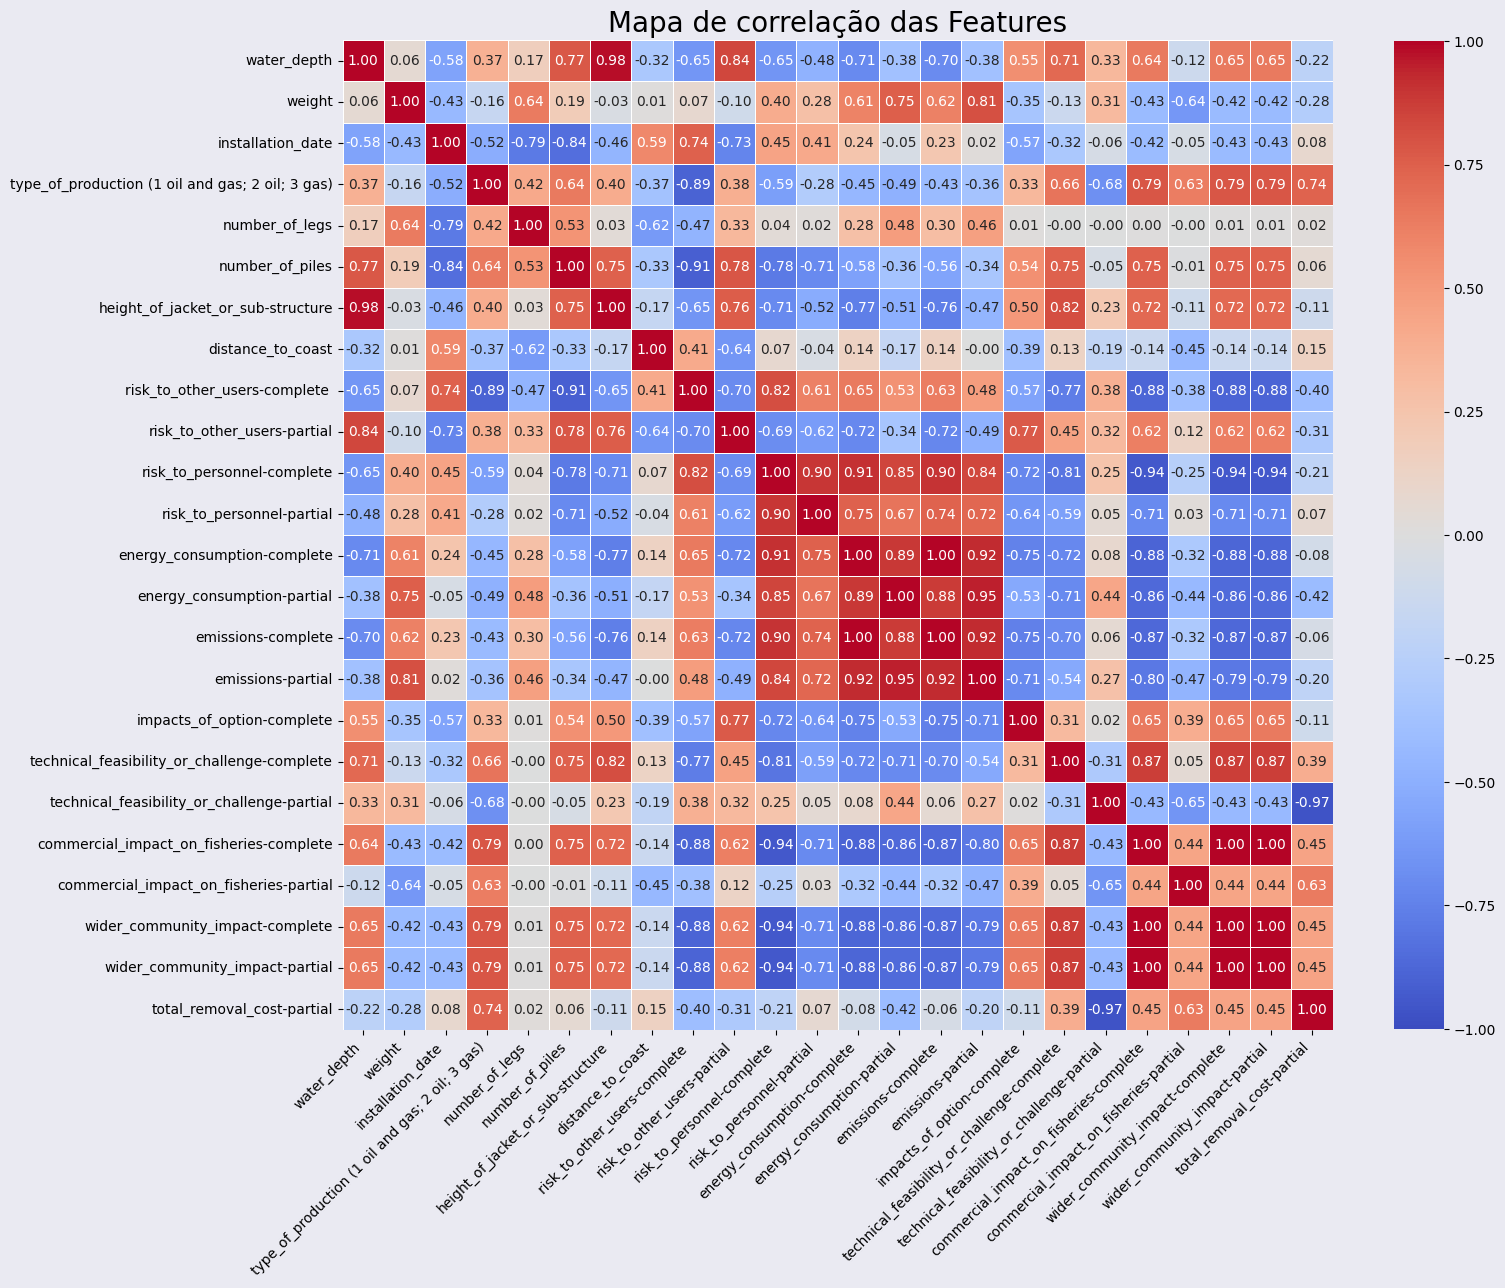

In [2686]:
matriz_correlacao = df.corr()

# Plotando o gráfico
plt.figure(figsize=(16, 16), facecolor='#eaeaf2')

ax = sns.heatmap(data=matriz_correlacao,
                xticklabels=df.columns,
                yticklabels=df.columns,
                annot=True, 
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                fmt='.2f',
                linewidths=0.7,
                cbar=True,
                cbar_kws={"shrink": 0.685} 

)

# Ajustando as labels na linha x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# título e apresentação do gráfico
plt.title('Mapa de correlação das Features', fontsize=20)

plt.tight_layout()

plt.show()

### Separando os atributos em grupos com forte correlação

![Grupos de correlação forte](grupos_de_atributos_correlacionados.png)

### Função para treinar os modelos de regressão linear

In [2687]:
def treinar_atributo(coluna_treinamento, coluna_alvo):
    regressao_linear = LinearRegression()

    # Redimensionando os arrays de entrada
    X = df[coluna_treinamento].values.reshape(-1, 1)
    y = df[coluna_alvo].values.reshape(-1, 1)

    # Treinando o modelo
    regressao_linear.fit(X, y)
    return regressao_linear

### Treinamento do Grupo Azul

#### Sorteando o valor de water_depth

In [2688]:
# Raiz
valor_water_depth = int(random.uniform(df["water_depth"].min(), df["water_depth"].max()))
valor_water_depth, df["water_depth"].dtype

(109, dtype('int64'))

#### Treinando os modelos

In [2689]:
# Treinamento dos modelos conectados diretamento com a raiz (altura 1)
height_of_jacket_or_sub_structure = treinar_atributo("water_depth", "height_of_jacket_or_sub-structure")
risk_to_other_users_partial = treinar_atributo("water_depth", "risk_to_other_users-partial")
number_of_piles = treinar_atributo("water_depth", "number_of_piles")

# Modelos na altura 2 da árvore
impacts_of_option_complete = treinar_atributo("risk_to_other_users-partial", "impacts_of_option-complete")


#### Estimando valores para um novo registro (Grupo Azul)

In [2690]:
# Altura 1
valor_height_of_jacket_or_sub_structure = round(height_of_jacket_or_sub_structure.predict([[valor_water_depth]])[0][0], 2) 
valor_risk_to_other_users_partial = risk_to_other_users_partial.predict([[valor_water_depth]])[0][0]
valor_number_of_piles = int(number_of_piles.predict([[valor_water_depth]])[0][0])

# Altura 2
valor_impacts_of_option_complete = round(impacts_of_option_complete.predict([[valor_risk_to_other_users_partial]])[0][0], 2)

In [2691]:
# Raiz
print(f"valor_water_depth: {valor_water_depth}")

# Altura 1
print(f"valor_height_of_jacket_or_sub_structure: {valor_height_of_jacket_or_sub_structure}")
print(f"valor_risk_to_other_users_partial: {valor_risk_to_other_users_partial}") 
print(f"valor_number_of_piles: {valor_number_of_piles}")

# Altura 2
print(f"valor_impacts_of_option_complete: {valor_impacts_of_option_complete}")

valor_water_depth: 109
valor_height_of_jacket_or_sub_structure: 124.62
valor_risk_to_other_users_partial: 1.7034803188401896e-06
valor_number_of_piles: 11
valor_impacts_of_option_complete: 0.5


In [2692]:
df[["water_depth", "height_of_jacket_or_sub-structure", "risk_to_other_users-partial", "number_of_piles", "impacts_of_option-complete"]]

,water_depth,height_of_jacket_or_sub-structure,risk_to_other_users-partial,number_of_piles,impacts_of_option-complete
0,99,114.0,0.000000e+00,8,0.43
1,112,123.0,0.000000e+00,9,0.51
2,141,147.0,2.500000e-05,26,0.66
3,156,166.0,1.500000e-05,32,0.53
4,103,122.5,7.800000e-08,20,0.53
5,144,154.0,1.335933e-05,20,0.53
6,116,136.0,0.000000e+00,5,0.53


### Treinamento do Grupo Roxo

#### função para mapear o valor type_of_production

In [2693]:
def mapear_type_of_production(valor):
    if valor <= 1.5:
        return 1
    elif valor <= 2.5:
        return 2
    else:
        return 3

#### Sorteando valor para "wider_community_impact-complete"

In [2694]:
# Raiz
valor_wider_community_impact_complete = round(random.uniform(df["wider_community_impact-complete"].min(), df["wider_community_impact-complete"].max()), 2)
valor_wider_community_impact_complete, df["wider_community_impact-complete"].dtypes

(0.78, dtype('float64'))

#### Treinamento os modelos

In [2695]:
# Treinamento dos modelos conectados diretamento com a raiz (altura 1)
commercial_impact_on_fisheries_complete = treinar_atributo("wider_community_impact-complete", "commercial_impact_on_fisheries-complete")
wider_community_impact_partial = treinar_atributo("wider_community_impact-complete", "wider_community_impact-partial")
technical_feasibility_or_challenge_complete = treinar_atributo("wider_community_impact-complete", "technical_feasibility_or_challenge-complete")
type_of_production = treinar_atributo("wider_community_impact-complete", "type_of_production (1 oil and gas; 2 oil; 3 gas)")

# Modelos na altura 2 da árvore
total_removal_cost_partial = treinar_atributo("type_of_production (1 oil and gas; 2 oil; 3 gas)", "total_removal_cost-partial")
commercial_impact_on_fisheries_partial = treinar_atributo("type_of_production (1 oil and gas; 2 oil; 3 gas)", "commercial_impact_on_fisheries-partial")

#### Estimando valores para um novo registro (Grupo Roxo)

In [2696]:
# Altura 1
valor_commercial_impact_on_fisheries_complete = round(commercial_impact_on_fisheries_complete.predict([[valor_wider_community_impact_complete]])[0][0], 2) 
valor_wider_community_impact_partial = round(wider_community_impact_partial.predict([[valor_wider_community_impact_complete]])[0][0], 2)
valor_technical_feasibility_or_challenge_complete = round(technical_feasibility_or_challenge_complete.predict([[valor_wider_community_impact_complete]])[0][0], 2)
valor_type_of_production = mapear_type_of_production(type_of_production.predict([[valor_wider_community_impact_complete]])[0][0])

# Altura 2
valor_total_removal_cost_partial = round(total_removal_cost_partial.predict([[valor_type_of_production]])[0][0], 2)
valor_commercial_impact_on_fisheries_partial = round(commercial_impact_on_fisheries_partial.predict([[valor_type_of_production]])[0][0], 2)

In [2697]:
# Raiz
print(f"valor_wider_community_impact_complete: {valor_wider_community_impact_complete}")

# Altura 1
print(f"valor_commercial_impact_on_fisheries_complete: {valor_commercial_impact_on_fisheries_complete}")
print(f"valor_wider_community_impact_partial: {valor_wider_community_impact_partial}")
print(f"valor_technical_feasibility_or_challenge_complete: {valor_technical_feasibility_or_challenge_complete}")
print(f"valor_type_of_production: {mapear_type_of_production(valor_type_of_production)}")

# Altura 2
print(f"valor_total_removal_cost_partial: {valor_total_removal_cost_partial}")
print(f"valor_commercial_impact_on_fisheries_partial: {valor_commercial_impact_on_fisheries_partial}")

valor_wider_community_impact_complete: 0.78
valor_commercial_impact_on_fisheries_complete: 0.91
valor_wider_community_impact_partial: 0.78
valor_technical_feasibility_or_challenge_complete: 0.24
valor_type_of_production: 2
valor_total_removal_cost_partial: 0.61
valor_commercial_impact_on_fisheries_partial: 0.87


In [2698]:
df[["wider_community_impact-complete", "commercial_impact_on_fisheries-complete", "wider_community_impact-partial", "technical_feasibility_or_challenge-complete", "type_of_production (1 oil and gas; 2 oil; 3 gas)", "total_removal_cost-partial", "commercial_impact_on_fisheries-partial"]]

,wider_community_impact-complete,commercial_impact_on_fisheries-complete,wider_community_impact-partial,technical_feasibility_or_challenge-complete,type_of_production (1 oil and gas; 2 oil; 3 gas),total_removal_cost-partial,commercial_impact_on_fisheries-partial
0,0.50,0.79,0.50,0.00,1,0.56,0.78
1,0.50,0.79,0.50,0.00,1,0.56,0.78
2,1.00,1.00,1.00,0.25,2,0.54,0.94
3,1.00,1.00,1.00,0.64,2,0.57,0.66
4,1.00,1.00,1.00,0.39,3,0.73,0.99
5,1.00,1.00,1.00,0.45,3,0.66,1.00
6,0.83,0.93,0.83,0.29,1,0.60,0.86


### Treinamento do Grupo Verde

#### Criando uma função que mapea valores float para 0 ou 1

In [2699]:
def mapear_0_ou_1(valor):
    if valor <= 0.5:
        return 0
    else:
        return 1

#### Sorteando um valor para "energy_consumption-complete" 

In [2700]:
valor_energy_consumption_complete = int(random.uniform(df["energy_consumption-complete"].min(), df["energy_consumption-complete"].max()))
valor_energy_consumption_complete, df["energy_consumption-complete"].dtype

(945401, dtype('int64'))

#### Treinando os modelos

In [2702]:
# Treinamento dos modelos conectados diretamento com a raiz (altura 1)
emissions_complete = treinar_atributo("energy_consumption-complete", "emissions-complete")
emissions_partial = treinar_atributo("energy_consumption-complete", "emissions-partial")
risk_to_personnel_complete = treinar_atributo("energy_consumption-complete", "risk_to_personnel-complete")
energy_consumption_partial = treinar_atributo("energy_consumption-complete", "energy_consumption-partial")

# altura 2 
weight = treinar_atributo("emissions-partial", "weight")
risk_to_other_users_complete = treinar_atributo("risk_to_personnel-complete", "risk_to_other_users-complete ")
risk_to_personnel_partial = treinar_atributo("risk_to_personnel-complete", "risk_to_personnel-partial")
technical_feasibility_or_challenge_partial = treinar_atributo("energy_consumption-partial", "technical_feasibility_or_challenge-partial")

# altura 3
number_of_legs = treinar_atributo("weight", "number_of_legs")
installation_date = treinar_atributo("risk_to_other_users-complete ", "installation_date")

# altura 4
distance_to_coast = treinar_atributo("installation_date", "distance_to_coast")

#### Estimando valores para um novo registro

In [2703]:
# altura 1
valor_emissions_complete = int(emissions_complete.predict([[valor_energy_consumption_complete]])[0][0])
valor_emissions_partial = int(emissions_partial.predict([[valor_energy_consumption_complete]])[0][0])
valor_risk_to_personnel_complete = round(risk_to_personnel_complete.predict([[valor_energy_consumption_complete]])[0][0], 3)
valor_energy_consumption_partial = int(energy_consumption_partial.predict([[valor_energy_consumption_complete]])[0][0])

# altura 2
valor_weight = int(weight.predict([[valor_emissions_partial]])[0][0])
valor_risk_to_other_users_complete = mapear_0_ou_1(risk_to_other_users_complete.predict([[valor_risk_to_personnel_complete]])[0][0])
valor_risk_to_personnel_partial = round(risk_to_personnel_partial.predict([[valor_risk_to_personnel_complete]])[0][0], 2)
valor_technical_feasibility_or_challenge_partial = round(technical_feasibility_or_challenge_partial.predict([[valor_energy_consumption_partial]])[0][0], 2)

# altura 3
valor_number_of_legs = int(number_of_legs.predict([[valor_weight]])[0][0])
valor_installation_date = int(installation_date.predict([[valor_risk_to_other_users_complete]])[0][0])

# altura 4
valor_distance_to_coast = int(distance_to_coast.predict([[valor_installation_date]])[0][0])

In [2704]:
# Raiz
print(f"valor_energy_consumption_complete: {valor_energy_consumption_complete}")

# Altura 1
print(f"valor_emissions_complete: {valor_emissions_complete}")
print(f"valor_emissions_partial: {valor_emissions_partial}")
print(f"valor_risk_to_personnel_complete: {valor_risk_to_personnel_complete}")
print(f"valor_energy_consumption_partial: {valor_energy_consumption_partial}")

# Altura 2
print(f"valor_weight: {valor_weight}")
print(f"valor_risk_to_other_users_complete: {valor_risk_to_other_users_complete}")
print(f"valor_risk_to_personnel_partial: {valor_risk_to_personnel_partial}")

# Altura 3
print(f"valor_number_of_legs: {valor_number_of_legs}")
print(f"valor_installation_date: {valor_installation_date}")
print(f"valor_distance_to_coast: {valor_distance_to_coast}")

valor_energy_consumption_complete: 945401
valor_emissions_complete: 74534
valor_emissions_partial: 53907
valor_risk_to_personnel_complete: 0.23
valor_energy_consumption_partial: 734005
valor_weight: 24272
valor_risk_to_other_users_complete: 1
valor_risk_to_personnel_partial: 0.12
valor_number_of_legs: 7
valor_installation_date: 1988
valor_distance_to_coast: 226


In [2705]:
df[["energy_consumption-complete", "emissions-complete", "emissions-partial", "risk_to_personnel-complete", "energy_consumption-partial", "weight", "risk_to_other_users-complete ", "risk_to_personnel-partial", "number_of_legs", "installation_date", "distance_to_coast"]]

,energy_consumption-complete,emissions-complete,emissions-partial,risk_to_personnel-complete,energy_consumption-partial,weight,risk_to_other_users-complete,risk_to_personnel-partial,number_of_legs,installation_date,distance_to_coast
0,1110100,87000,58500,0.290,817000,22000,1,0.12,8,1988,187
1,1180500,92000,64000,0.320,895500,30364,1,0.16,8,1983,207
2,297654,24277,31064,0.025,530148,15561,0,0.01,8,1978,120
3,487750,40416,45266,0.040,570818,27647,0,0.02,8,1980,240
4,733082,59588,41170,0.090,511765,18584,0,0.06,8,1983,230
5,520000,42000,44000,0.140,568000,17500,0,0.13,8,1983,130
6,469823,37162,32191,0.140,433179,10054,1,0.08,4,1993,282


### Gerando os novos registros

In [2706]:
def novos_registros_regressao_linear(quantidade_registros):
   ################################ TREINAMENTO DOS MODELOS ###########################

   # --------------------------- Grupo Azul ------------------------------

   # Treinamento dos modelos conectados diretamento com a raiz (altura 1)
   height_of_jacket_or_sub_structure = treinar_atributo("water_depth", "height_of_jacket_or_sub-structure")
   risk_to_other_users_partial = treinar_atributo("water_depth", "risk_to_other_users-partial")
   number_of_piles = treinar_atributo("water_depth", "number_of_piles")

   # Modelos na altura 2 da árvore
   impacts_of_option_complete = treinar_atributo("risk_to_other_users-partial", "impacts_of_option-complete")

   # --------------------------- Grupo Roxo ------------------------------

   # Treinamento dos modelos conectados diretamento com a raiz (altura 1)
   commercial_impact_on_fisheries_complete = treinar_atributo("wider_community_impact-complete", "commercial_impact_on_fisheries-complete")
   wider_community_impact_partial = treinar_atributo("wider_community_impact-complete", "wider_community_impact-partial")
   technical_feasibility_or_challenge_complete = treinar_atributo("wider_community_impact-complete", "technical_feasibility_or_challenge-complete")
   type_of_production = treinar_atributo("wider_community_impact-complete", "type_of_production (1 oil and gas; 2 oil; 3 gas)")

   # Modelos na altura 2 da árvore
   total_removal_cost_partial = treinar_atributo("type_of_production (1 oil and gas; 2 oil; 3 gas)", "total_removal_cost-partial")
   commercial_impact_on_fisheries_partial = treinar_atributo("type_of_production (1 oil and gas; 2 oil; 3 gas)", "commercial_impact_on_fisheries-partial")

   # --------------------------- Grupo Verde ------------------------------
   # Treinamento dos modelos conectados diretamento com a raiz (altura 1)
   emissions_complete = treinar_atributo("energy_consumption-complete", "emissions-complete")
   emissions_partial = treinar_atributo("energy_consumption-complete", "emissions-partial")
   risk_to_personnel_complete = treinar_atributo("energy_consumption-complete", "risk_to_personnel-complete")
   energy_consumption_partial = treinar_atributo("energy_consumption-complete", "energy_consumption-partial")

   # Modelos na altura 2 da árvore
   weight = treinar_atributo("emissions-partial", "weight")
   risk_to_other_users_complete = treinar_atributo("risk_to_personnel-complete", "risk_to_other_users-complete ")
   risk_to_personnel_partial = treinar_atributo("risk_to_personnel-complete", "risk_to_personnel-partial")
   technical_feasibility_or_challenge_partial = treinar_atributo("energy_consumption-partial", "technical_feasibility_or_challenge-partial")

   # Modelos na altura 3
   number_of_legs = treinar_atributo("weight", "number_of_legs")
   installation_date = treinar_atributo("risk_to_other_users-complete ", "installation_date")

   # Modelos na altura 4
   distance_to_coast = treinar_atributo("installation_date", "distance_to_coast")

   ######################### CRIAÇÃO DOS REGISTROS ################################
   
   registros = []

   for _ in range(quantidade_registros):
      # -------------------------- Estimando valores do grupo Azul --------------------------------
      # Raiz
      valor_water_depth = int(random.uniform(df["water_depth"].min(), df["water_depth"].max()))
      
      # Altura 1
      valor_height_of_jacket_or_sub_structure = round(height_of_jacket_or_sub_structure.predict([[valor_water_depth]])[0][0], 2) 
      valor_risk_to_other_users_partial = risk_to_other_users_partial.predict([[valor_water_depth]])[0][0]
      valor_number_of_piles = int(number_of_piles.predict([[valor_water_depth]])[0][0])

      # Altura 2
      valor_impacts_of_option_complete = round(impacts_of_option_complete.predict([[valor_risk_to_other_users_partial]])[0][0], 2)

      # -------------------------- Estimando valores do grupo Roxo --------------------------------
      # Raiz
      valor_wider_community_impact_complete = round(random.uniform(df["wider_community_impact-complete"].min(), df["wider_community_impact-complete"].max()), 2)
      
      # Altura 1
      valor_commercial_impact_on_fisheries_complete = round(commercial_impact_on_fisheries_complete.predict([[valor_wider_community_impact_complete]])[0][0], 2) 
      valor_wider_community_impact_partial = round(wider_community_impact_partial.predict([[valor_wider_community_impact_complete]])[0][0], 2)
      valor_technical_feasibility_or_challenge_complete = round(technical_feasibility_or_challenge_complete.predict([[valor_wider_community_impact_complete]])[0][0], 2)
      valor_type_of_production = mapear_type_of_production(type_of_production.predict([[valor_wider_community_impact_complete]])[0][0])

      # Altura 2
      valor_total_removal_cost_partial = round(total_removal_cost_partial.predict([[valor_type_of_production]])[0][0], 2)
      valor_commercial_impact_on_fisheries_partial = round(commercial_impact_on_fisheries_partial.predict([[valor_type_of_production]])[0][0], 2)
      
      # -------------------------- Estimando valores do grupo Verde --------------------------------
      valor_energy_consumption_complete = int(random.uniform(df["energy_consumption-complete"].min(), df["energy_consumption-complete"].max()))
      
      # altura 1
      valor_emissions_complete = int(emissions_complete.predict([[valor_energy_consumption_complete]])[0][0])
      valor_emissions_partial = int(emissions_partial.predict([[valor_energy_consumption_complete]])[0][0])
      valor_risk_to_personnel_complete = round(risk_to_personnel_complete.predict([[valor_energy_consumption_complete]])[0][0], 3)
      valor_energy_consumption_partial = int(energy_consumption_partial.predict([[valor_energy_consumption_complete]])[0][0])

      # altura 2
      valor_weight = int(weight.predict([[valor_emissions_partial]])[0][0])
      valor_risk_to_other_users_complete = mapear_0_ou_1(risk_to_other_users_complete.predict([[valor_risk_to_personnel_complete]])[0][0])
      valor_risk_to_personnel_partial = round(risk_to_personnel_partial.predict([[valor_risk_to_personnel_complete]])[0][0], 2)
      valor_technical_feasibility_or_challenge_partial = round(technical_feasibility_or_challenge_partial.predict([[valor_energy_consumption_partial]])[0][0], 2)

      # altura 3
      valor_number_of_legs = int(number_of_legs.predict([[valor_weight]])[0][0])
      valor_installation_date = int(installation_date.predict([[valor_risk_to_other_users_complete]])[0][0])
      
      
      # altura 4
      valor_distance_to_coast = int(distance_to_coast.predict([[valor_installation_date]])[0][0])

      # -------------------------- Sorteando valores do grupo Vermelho --------------------------------
      
      # Armazenando os valores estimados em uma lista
      registros.append([valor_water_depth, valor_weight, valor_installation_date,
      valor_type_of_production, valor_number_of_legs,
      valor_number_of_piles, valor_height_of_jacket_or_sub_structure,
      valor_distance_to_coast, valor_risk_to_other_users_complete,
      valor_risk_to_other_users_partial, valor_risk_to_personnel_complete,
      valor_risk_to_personnel_partial, valor_energy_consumption_complete,
      valor_energy_consumption_partial, valor_emissions_complete, valor_emissions_partial,
      valor_impacts_of_option_complete,
      valor_technical_feasibility_or_challenge_complete,
      valor_technical_feasibility_or_challenge_partial,
      valor_commercial_impact_on_fisheries_complete,
      valor_commercial_impact_on_fisheries_partial,
      valor_wider_community_impact_complete, valor_wider_community_impact_partial,
      valor_total_removal_cost_partial])

   # Criando DataFrame com os valores estimados
   colunas = ['water_depth', 'weight', 'installation_date',
      'type_of_production (1 oil and gas; 2 oil; 3 gas)', 'number_of_legs',
      'number_of_piles', 'height_of_jacket_or_sub-structure',
      'distance_to_coast', 'risk_to_other_users-complete ',
      'risk_to_other_users-partial', 'risk_to_personnel-complete',
      'risk_to_personnel-partial', 'energy_consumption-complete',
      'energy_consumption-partial', 'emissions-complete', 'emissions-partial',
      'impacts_of_option-complete',
      'technical_feasibility_or_challenge-complete',
      'technical_feasibility_or_challenge-partial',
      'commercial_impact_on_fisheries-complete',
      'commercial_impact_on_fisheries-partial',
      'wider_community_impact-complete', 'wider_community_impact-partial',
      'total_removal_cost-partial']

   df_novos_registros = pd.DataFrame(registros, columns=colunas)

   return df_novos_registros


In [2707]:
df_regressao_linear = novos_registros_regressao_linear(21)
df_regressao_linear = df_concatenado = pd.concat([df, df_regressao_linear], ignore_index=True)

In [2708]:
df_regressao_linear.head(10)

,water_depth,weight,installation_date,type_of_production (1 oil and gas; 2 oil; 3 gas),number_of_legs,number_of_piles,height_of_jacket_or_sub-structure,distance_to_coast,risk_to_other_users-complete,risk_to_other_users-partial,...,emissions-complete,emissions-partial,impacts_of_option-complete,technical_feasibility_or_challenge-complete,technical_feasibility_or_challenge-partial,commercial_impact_on_fisheries-complete,commercial_impact_on_fisheries-partial,wider_community_impact-complete,wider_community_impact-partial,total_removal_cost-partial
0,99,22000,1988,1,8,8,114.00,187,1,0.000000e+00,...,87000,58500,0.43,0.00,1.00,0.79,0.78,0.50,0.50,0.56
1,112,30364,1983,1,8,9,123.00,207,1,0.000000e+00,...,92000,64000,0.51,0.00,1.00,0.79,0.78,0.50,0.50,0.56
2,141,15561,1978,2,8,26,147.00,120,0,2.500000e-05,...,24277,31064,0.66,0.25,1.00,1.00,0.94,1.00,1.00,0.54
3,156,27647,1980,2,8,32,166.00,240,0,1.500000e-05,...,40416,45266,0.53,0.64,1.00,1.00,0.66,1.00,1.00,0.57
4,103,18584,1983,3,8,20,122.50,230,0,7.800000e-08,...,59588,41170,0.53,0.39,0.15,1.00,0.99,1.00,1.00,0.73
5,144,17500,1983,3,8,20,154.00,130,0,1.335933e-05,...,42000,44000,0.53,0.45,0.70,1.00,1.00,1.00,1.00,0.66
6,116,10054,1993,1,4,5,136.00,282,1,0.000000e+00,...,37162,32191,0.53,0.29,0.81,0.93,0.86,0.83,0.83,0.60
7,112,15523,1981,1,6,12,127.13,178,0,2.856618e-06,...,31315,34931,0.51,0.17,0.70,0.87,0.78,0.69,0.69,0.55
8,108,16715,1981,2,6,11,123.79,178,0,1.319101e-06,...,37205,37517,0.50,0.27,0.73,0.92,0.87,0.81,0.81,0.61
9,130,27208,1988,2,8,19,142.15,226,1,9.775447e-06,...,89036,60275,0.54,0.41,0.97,0.99,0.87,0.97,0.97,0.61


In [2709]:
df_regressao_linear.shape

(28, 24)

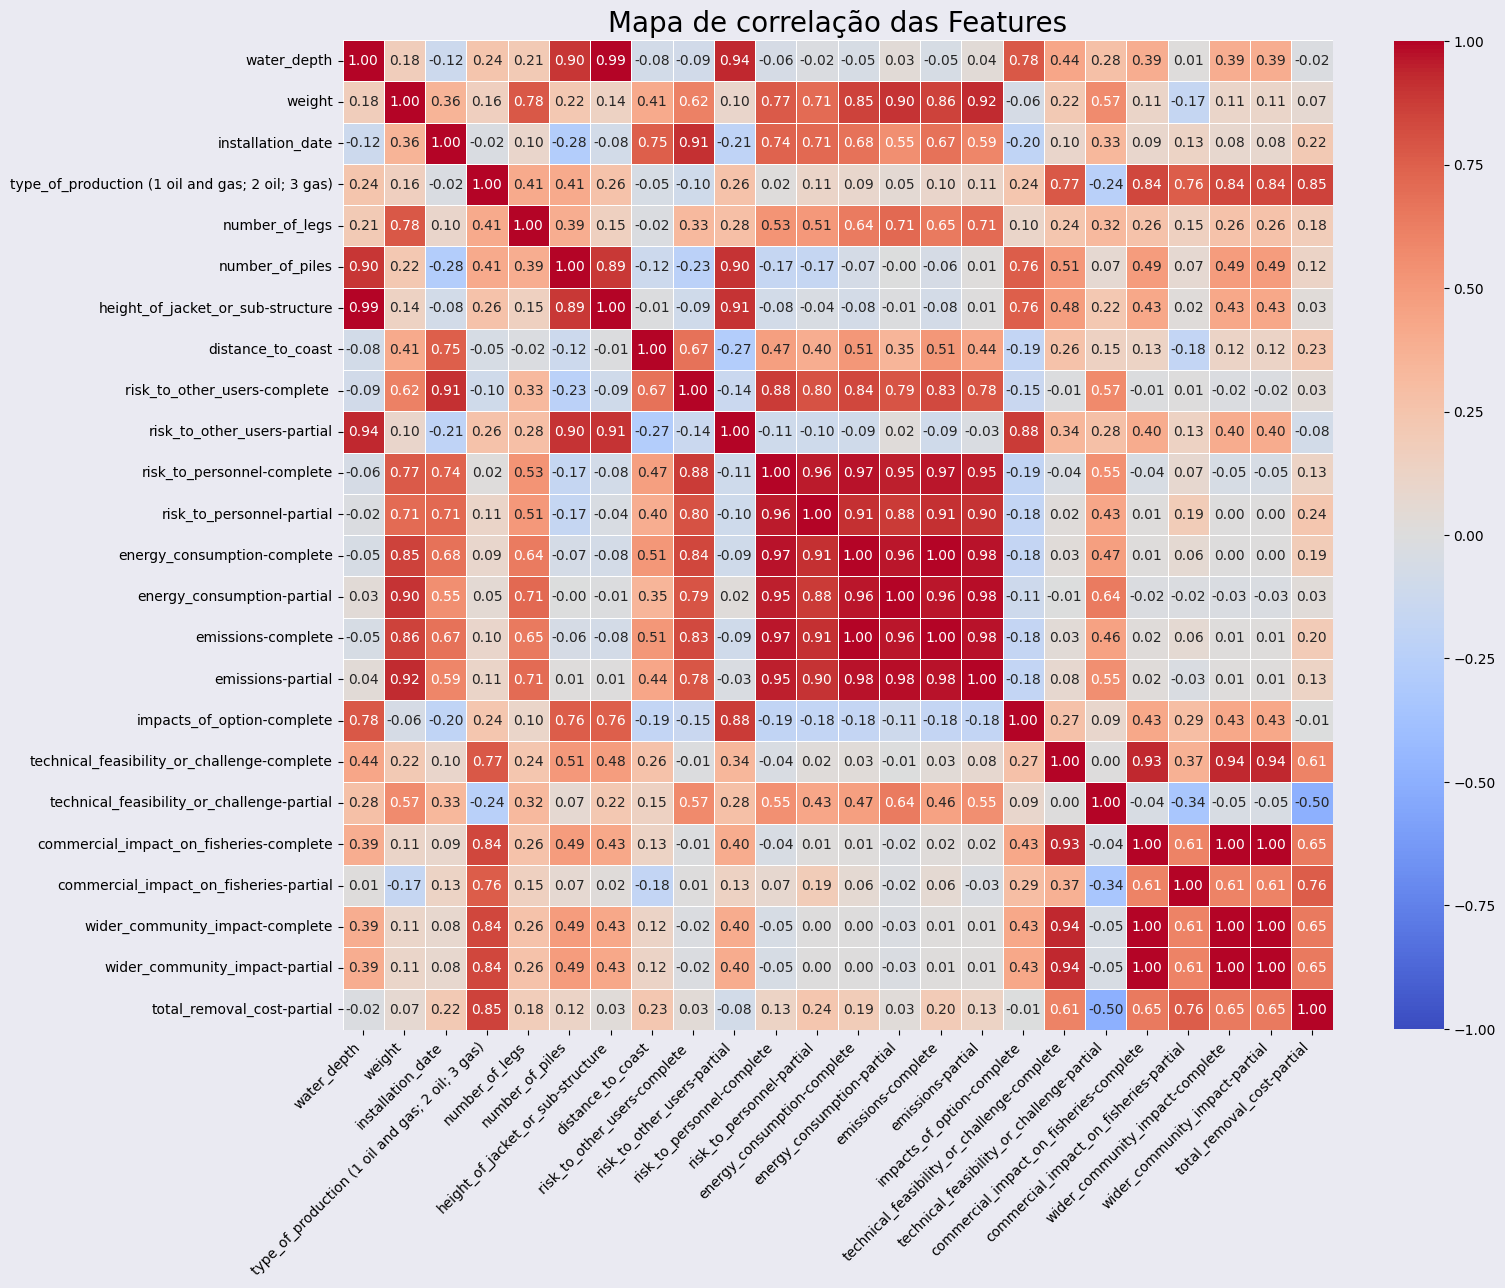

In [2710]:
matriz_correlacao = df_regressao_linear.corr()

# Plotando o gráfico
plt.figure(figsize=(16, 16), facecolor='#eaeaf2')

ax = sns.heatmap(data=matriz_correlacao,
                xticklabels=df_regressao_linear.columns,
                yticklabels=df_regressao_linear.columns,
                annot=True, 
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                fmt='.2f',
                linewidths=0.7,
                cbar=True,
                cbar_kws={"shrink": 0.685} 

)

# Ajustando as labels na linha x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# título e apresentação do gráfico
plt.title('Mapa de correlação das Features', fontsize=20)

plt.tight_layout()

plt.show()

In [2711]:
df_regressao_linear = novos_registros_regressao_linear(1000)
df_regressao_linear = df_concatenado = pd.concat([df, df_regressao_linear], ignore_index=True)

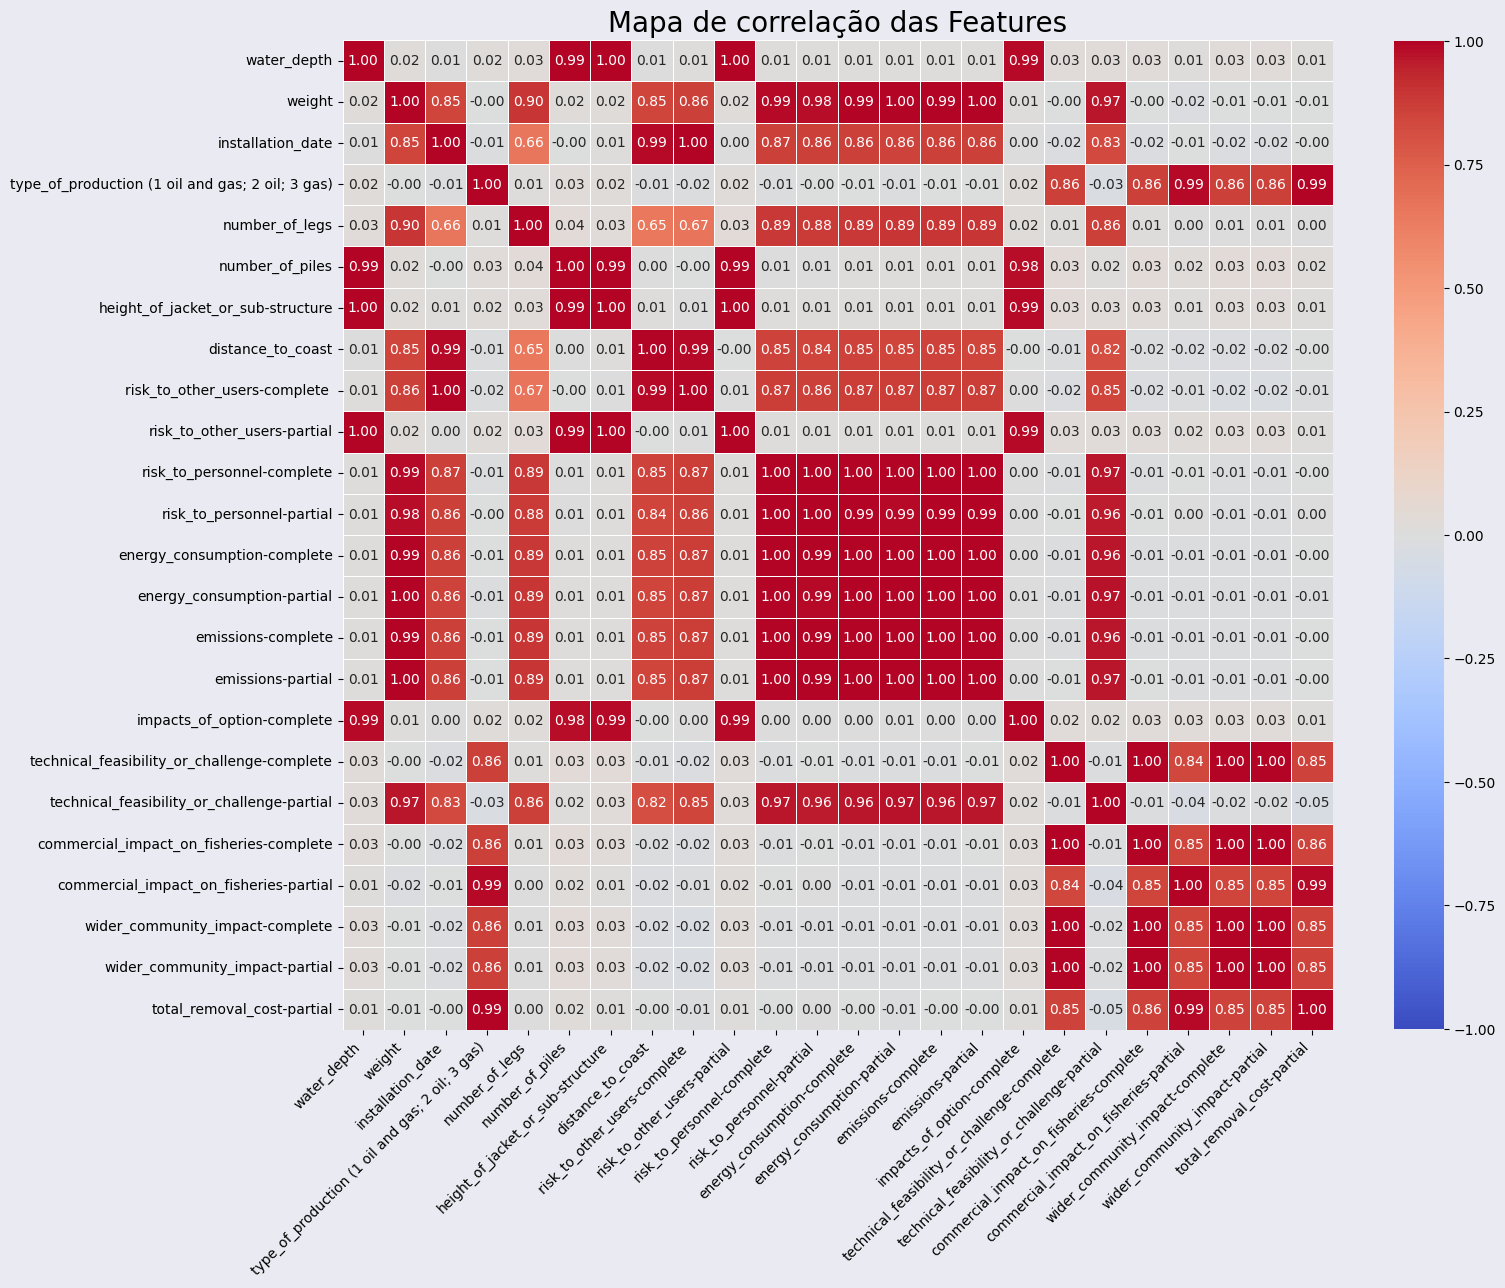

In [2712]:
matriz_correlacao = df_regressao_linear.corr()

# Plotando o gráfico
plt.figure(figsize=(16, 16), facecolor='#eaeaf2')

ax = sns.heatmap(data=matriz_correlacao,
                xticklabels=df_regressao_linear.columns,
                yticklabels=df_regressao_linear.columns,
                annot=True, 
                cmap='coolwarm',
                center=0,
                vmin=-1,
                vmax=1,
                square=True,
                fmt='.2f',
                linewidths=0.7,
                cbar=True,
                cbar_kws={"shrink": 0.685} 

)

# Ajustando as labels na linha x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# título e apresentação do gráfico
plt.title('Mapa de correlação das Features', fontsize=20)

plt.tight_layout()

plt.show()